# data cleaning

In [42]:
# load california house price dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
california = fetch_california_housing()
# fetch the features as X and MedHouseVal as y
X = california.data
y = california.target
# print the dimension of the data
print(X.shape)
print(y.shape)

# print the column name of the data
print(california.feature_names)



import matplotlib.pyplot as plt
df = pd.DataFrame()
for i in range(8):
    df[california["feature_names"][i]]=X[:, i]
df["MedHouseVal"] = y
df.info()
df.to_csv("./fetch_california_housing.csv", index=None)

(20640, 8)
(20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [43]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>],
       [<Axes: title={'center': 'IncCat'}>, <Axes: >, <Axes: >]],
      dtype=object)

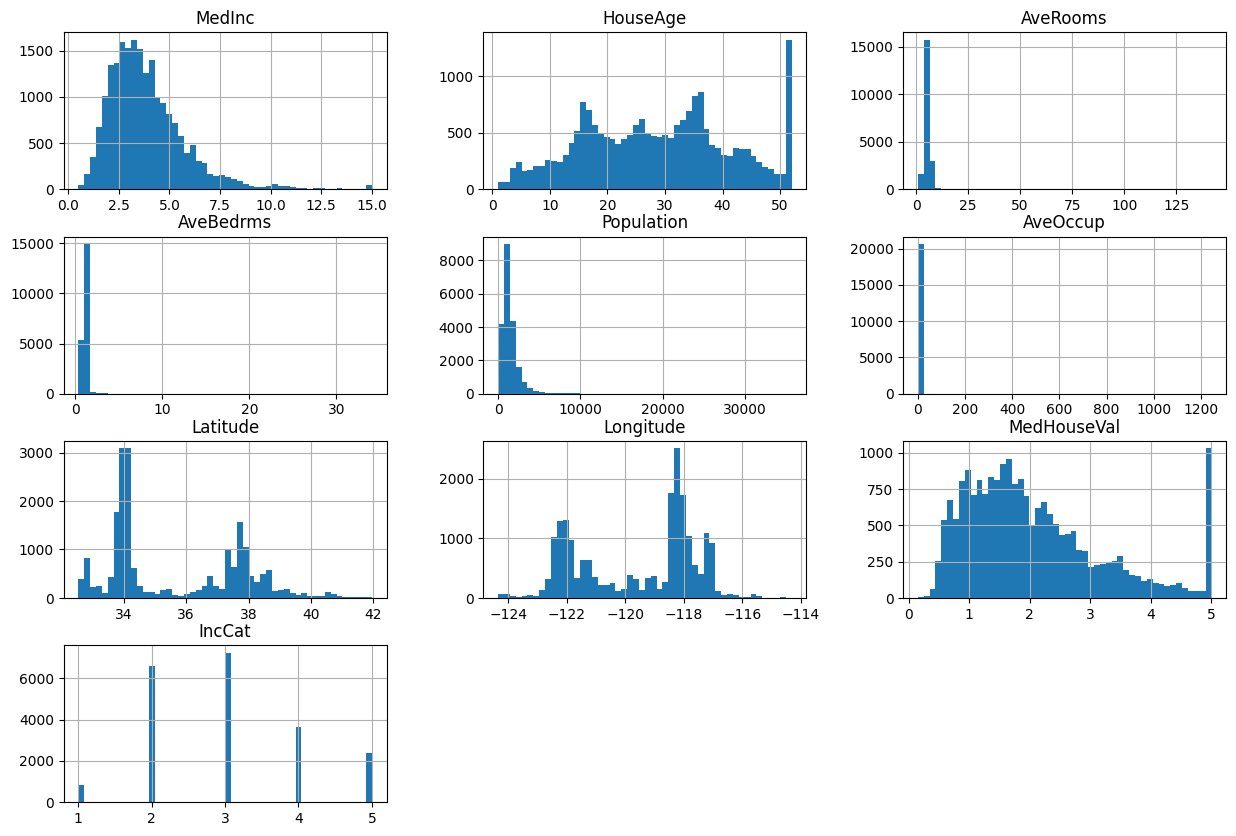

In [54]:
df.hist(bins=50,figsize=(15,10))

In [45]:
# # dataset preprocess
# # normalize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
#
# # split the data into training and testing
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Exploratory Data Analysis

In [46]:
import numpy as np
# Defined a new feature income_cat which is income category and used if for sampling
df['IncCat']=np.ceil(df['MedInc']/1.5)
df['IncCat'].where(df['IncCat']<5,5.0,inplace=True)

# split the data into training and testing
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['IncCat']):
    train_set=df.loc[train_index]
    test_set=df.loc[test_index]

train_set.drop('IncCat',axis=1,inplace=True)
test_set.drop('IncCat',axis=1,inplace=True)

train_set.to_csv("train_set.csv",index=False)
test_set.to_csv("test_set.csv",index=False)

data=pd.read_csv('train_set.csv')
#data.drop('Unnamed: 0',axis=1,inplace=True)

Text(0.5, 1.0, 'Distribution of households')

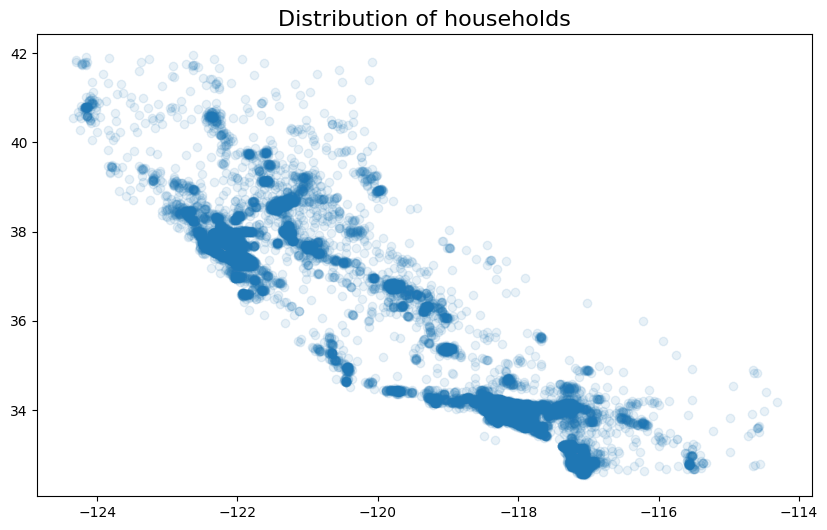

In [48]:
# use 'Longitude'&'Latitude' to explore Distribution of households
# By setting alpha=0.1, we can see high density areas.
plt.figure(figsize=(10,6))
plt.scatter(x=data['Longitude'],y=data['Latitude'],alpha=0.1)
plt.title("Distribution of Households",size=16)

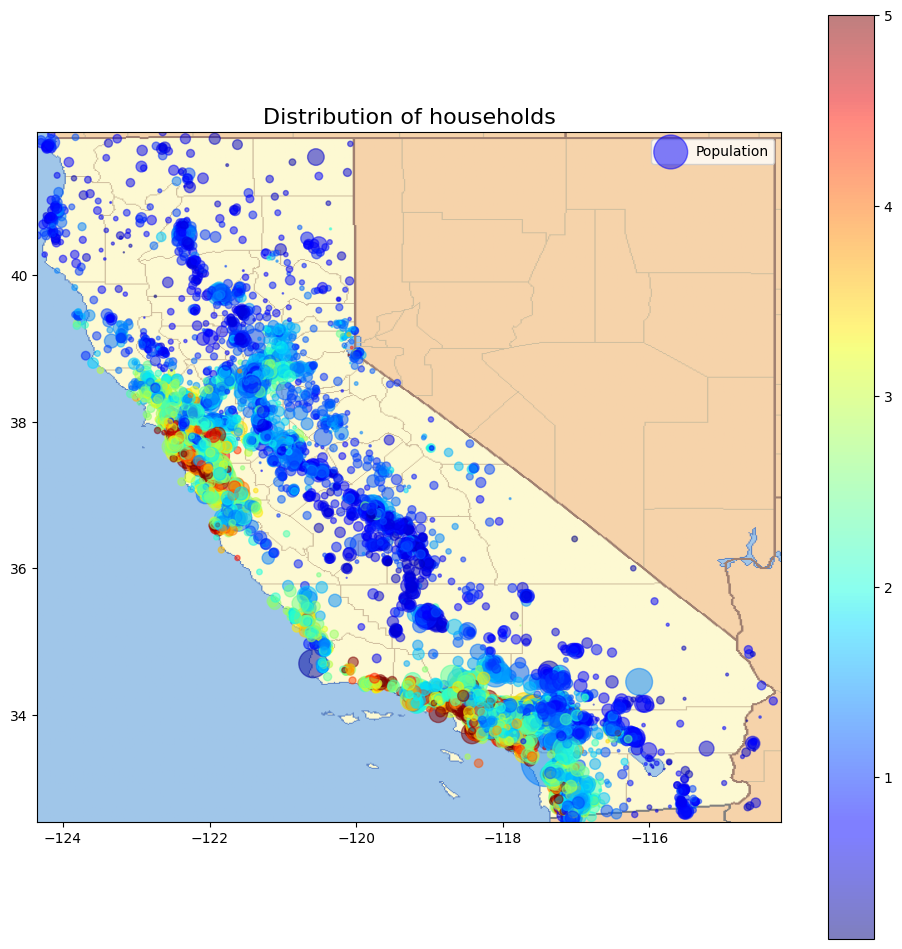

In [49]:
plt.figure(figsize=(12,12))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=data['Longitude'],y=data['Latitude'],alpha=0.5,s=data['Population']/30,c=data['MedHouseVal'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of Households",size=16)
plt.legend()

use  Pearson's correlation coefficient to see the correlation of 'medial house value' with other columns

In [50]:
corr_matrix=data.corr()
corr_matrix['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.687151
AveRooms       0.146255
HouseAge       0.114146
AveOccup      -0.021991
Population    -0.026882
AveBedrms     -0.043294
Longitude     -0.047466
Latitude      -0.142673
Name: MedHouseVal, dtype: float64

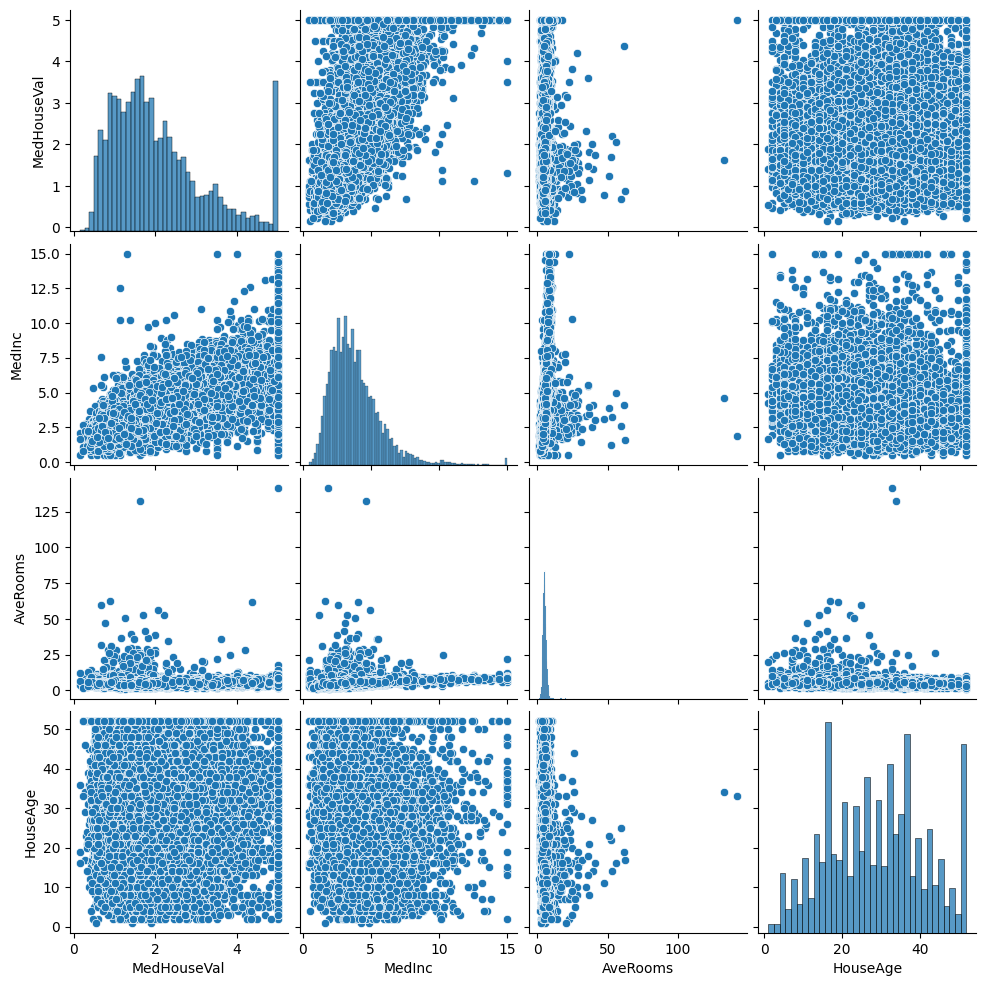

In [51]:
import seaborn as sns
sns.pairplot(data[['MedHouseVal','MedInc','AveRooms','HouseAge']])

Median Income is the most promising attribute to get Median House Price

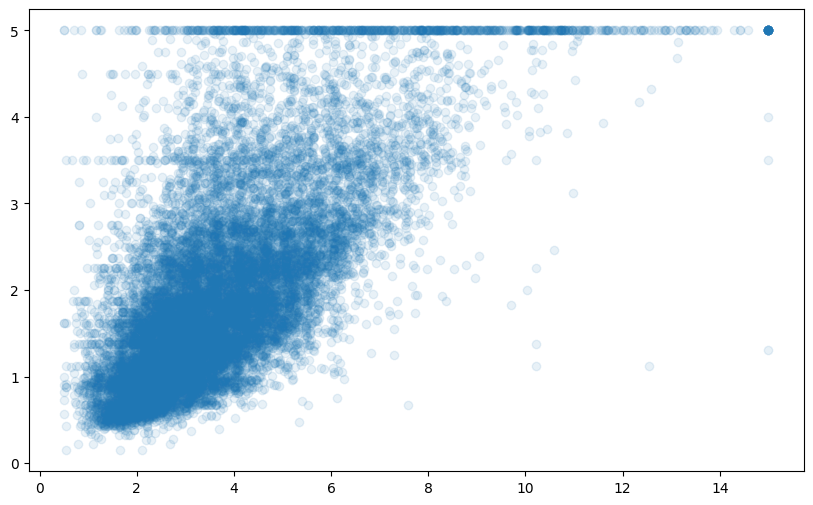

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(y=data['MedHouseVal'],x=data['MedInc'],alpha=0.1)

A clear line can be seen at 500k at which the data is capped. Similar lines can be seen around 450k,350k. This kind of data may degrade the performance of model.